# 🧠 Day 1 – Python Fundamentals with Live Market Data
---

### 🧩 Section 1: Environment Check

In [5]:
# Check Python environment and imports
import sys, os
print('Python version:', sys.version)
print('Current working directory:', os.getcwd())

Python version: 3.13.8 (tags/v3.13.8:a15ae61, Oct  7 2025, 12:34:25) [MSC v.1944 64 bit (AMD64)]
Current working directory: C:\Users\akhen\Documents\DipperProjects\crypto-arb-bot\notebooks


### ⚙️ Section 2: Live Data from Exchanges

In [2]:
# Install ccxt if not installed (uncomment if needed)
# !pip install ccxt matplotlib

import ccxt
import matplotlib.pyplot as plt

# Initialize exchange connections (public data only)
binance = ccxt.binance({'enableRateLimit': True})
coinbase = ccxt.coinbase({'enableRateLimit': True})
kraken = ccxt.kraken({'enableRateLimit': True})

# Fetch live ticker data for BTC/USDT
def fetch_price(exchange, pair='BTC/USDT'):
    try:
        ticker = exchange.fetch_ticker(pair)
        return ticker['last']
    except Exception as e:
        print(exchange.id, 'error:', e)
        return None

prices = {
    'binance': fetch_price(binance),
    'coinbase': fetch_price(coinbase),
    'kraken': fetch_price(kraken)
}
prices

{'binance': 121544.4, 'coinbase': 121504.58, 'kraken': 121561.4}

### 💰 Section 3: Compute Live Spreads

In [3]:
# Remove None values
prices = {k:v for k,v in prices.items() if v}

best_buy = min(prices, key=prices.get)
best_sell = max(prices, key=prices.get)
spread = prices[best_sell] - prices[best_buy]
percent_spread = spread / ((prices[best_sell] + prices[best_buy])/2) * 100

print(f'Buy on {best_buy} at {prices[best_buy]:.2f}, sell on {best_sell} at {prices[best_sell]:.2f}')
print(f'Spread: ${spread:.2f} ({percent_spread:.3f}%)')

Buy on coinbase at 121504.58, sell on kraken at 121561.40
Spread: $56.82 (0.047%)


### 📊 Section 4: Visualize Live Prices

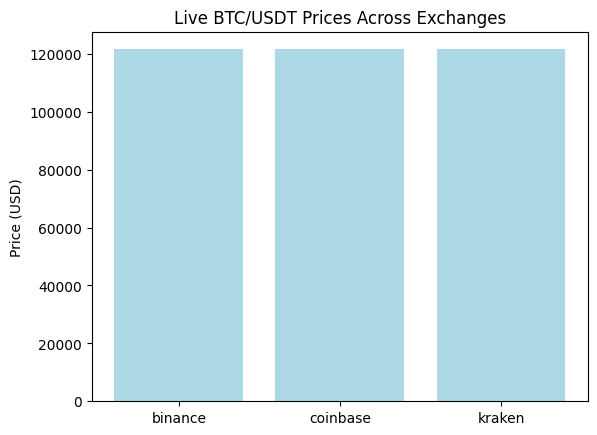

In [4]:
plt.bar(prices.keys(), prices.values(), color='lightblue')
plt.title('Live BTC/USDT Prices Across Exchanges')
plt.ylabel('Price (USD)')
plt.show()

### 📘 Section 5: Reflection / Notes
- This notebook now fetches real-time data using ccxt.
- Compared live BTC/USDT prices across multiple exchanges.
- Computed live spreads and visualized market differences.
- Next: Automate periodic data fetching and log historical spreads.